<a href="https://colab.research.google.com/github/ariefbsusilo/Sentiment-Analysis-Google-Review/blob/main/Sentiment_Analysis_Review_Google_Maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original 'rating' column values before conversion:
 rating
5 bintang    34128
1 bintang     1467
4 bintang     1289
3 bintang      446
2 bintang      307
Name: count, dtype: int64
Total Review Negatif: 2220 data


/tmp/ipython-input-2267792109.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y, y=x, palette='viridis')


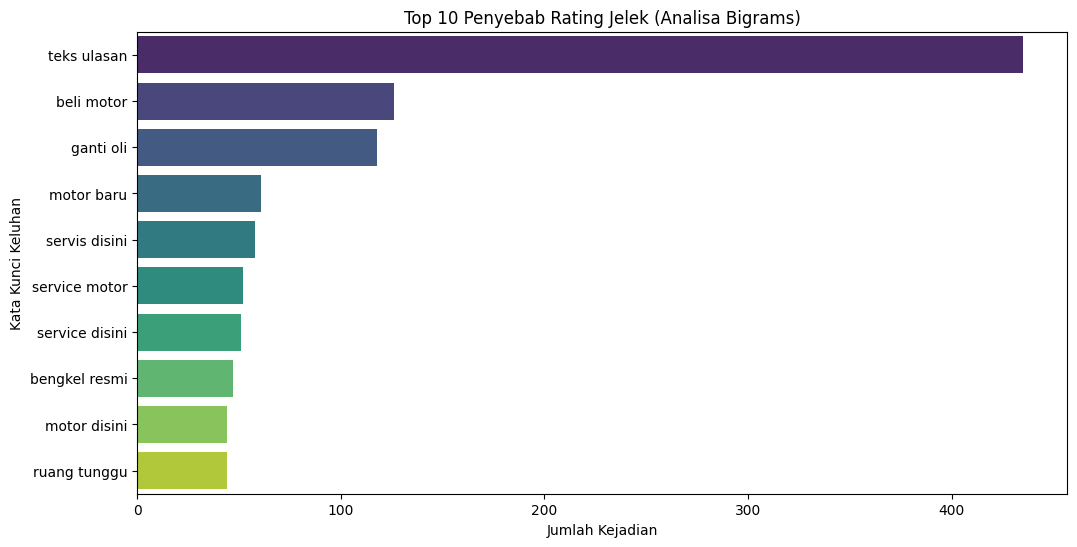

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import re

# ==========================================
# 1. LOAD DATA & BERSIH-BERSIH
# ==========================================

# Ganti 'nama_file_kamu.csv' dengan nama file aslimu
df = pd.read_csv('google_maps_reviews.csv', encoding='latin1')

# --- DEBUG: Inspect 'rating' column before conversion ---
print("Original 'rating' column values before conversion:\n", df['rating'].value_counts(dropna=False))
# -------------------------------------------------------

# Bersihkan kolom 'rating' dari teks ' bintang' dan ubah ke numerik
df['rating'] = df['rating'].astype(str).str.replace(' bintang', '', regex=False)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Filter: Kita hanya ambil rating JELEK (Bintang 1, 2, dan 3)
# Tujuannya mencari tahu "Kenapa orang marah?"
negative_reviews = df[df['rating'] <= 3].copy()

# Buat list kata sambung (Stopwords) bahasa Indonesia untuk dibuang
stopwords_indonesia = [
    'dan', 'di', 'ke', 'dari', 'yang', 'ini', 'itu', 'ada', 'adalah',
    'saya', 'aku', 'kami', 'kita', 'untuk', 'pada', 'dengan', 'banget',
    'sangat', 'sudah', 'tapi', 'tetapi', 'kalau', 'juga', 'yg', 'gak',
    'nggak', 'tidak', 'aja', 'bisa', 'lagi', 'mau', 'sama', 'dong',
    'karena', 'nya', 'ya', 'ga', 'di', 'mas', 'mba', 'pak', 'bu'
]

def clean_text(text):
    if not isinstance(text, str): return "" # Handle jika ada kolom kosong
    text = text.lower() # Huruf kecil semua
    text = re.sub(r'[^\w\s]', '', text) # Hapus tanda baca (!, ?, .)
    text = re.sub(r'\d+', '', text) # Hapus angka

    # Hapus stopwords (kata tidak penting)
    words = [w for w in text.split() if w not in stopwords_indonesia]
    return " ".join(words)

# Terapkan cleaning ke kolom 'teks_ulasan'
negative_reviews['clean_text'] = negative_reviews['teks_ulasan'].apply(clean_text)

print(f"Total Review Negatif: {len(negative_reviews)} data")


# ==========================================
# 2. CARI BIANG KEROK (BIGRAMS)
# ==========================================

def get_top_n_gram(corpus, n=None, n_gram=2):
    # n_gram=2 artinya kita cari "2 kata berurutan" (Frasa)
    # Contoh: "pelayanan buruk", "makanan dingin"
    vec = CountVectorizer(ngram_range=(n_gram, n_gram)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Ambil 10 keluhan paling sering muncul
top_complaints = get_top_n_gram(negative_reviews['clean_text'], n=10, n_gram=2)
x, y = map(list, zip(*top_complaints))

# ==========================================
# 3. VISUALISASI
# ==========================================

plt.figure(figsize=(12, 6))
sns.barplot(x=y, y=x, palette='viridis')
plt.title('Top 10 Penyebab Rating Jelek (Analisa Bigrams)')
plt.xlabel('Jumlah Kejadian')
plt.ylabel('Kata Kunci Keluhan')
plt.show()

/tmp/ipython-input-47993553.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_trigram, y=x_trigram, palette='magma')


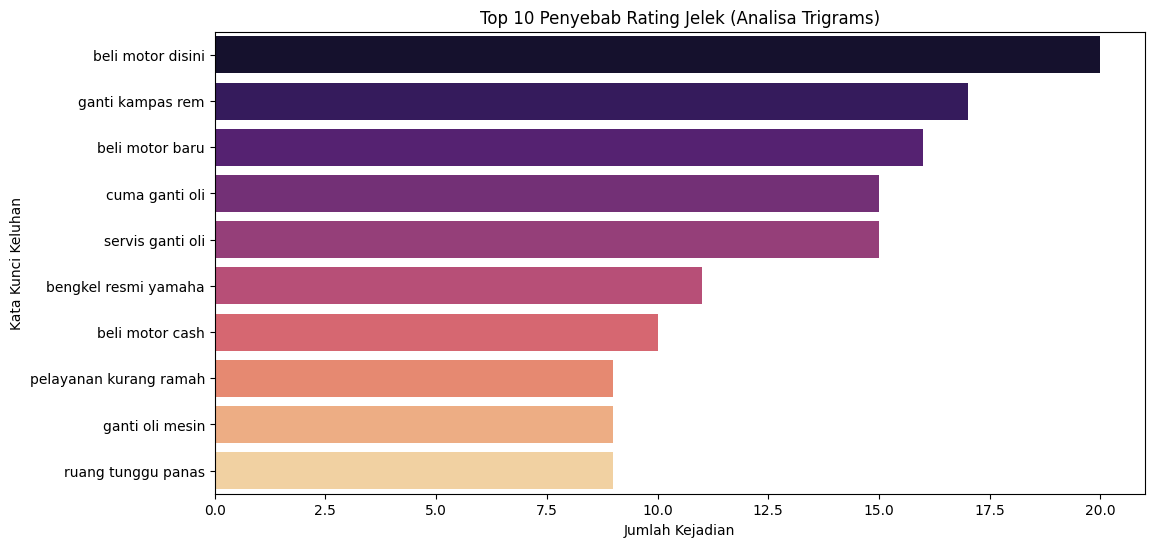

In [8]:
top_trigrams = get_top_n_gram(negative_reviews['clean_text'], n=10, n_gram=3)
x_trigram, y_trigram = map(list, zip(*top_trigrams))

plt.figure(figsize=(12, 6))
sns.barplot(x=y_trigram, y=x_trigram, palette='magma')
plt.title('Top 10 Penyebab Rating Jelek (Analisa Trigrams)')
plt.xlabel('Jumlah Kejadian')
plt.ylabel('Kata Kunci Keluhan')
plt.show()

# Task
Count the number of negative reviews for each unique place ('Nama Tempat') from the `negative_reviews` DataFrame, identify the top 10 places with the most negative reviews, and then generate a bar chart visualizing these top 10 places and their respective negative review counts.

## Count Negative Reviews per Place

### Subtask:
Group the `negative_reviews` DataFrame by 'Nama Tempat' and count the total number of negative reviews for each unique place.


**Reasoning**:
Group the `negative_reviews` DataFrame by 'Nama Tempat' and count the occurrences of each unique place, then store the result and display the top 10.



In [9]:
negative_reviews_per_place = negative_reviews['Nama Tempat'].value_counts()
print("Top 10 Places with Most Negative Reviews:")
print(negative_reviews_per_place.head(10))

Top 10 Places with Most Negative Reviews:
Nama Tempat
Yamaha Harpindo Jaya                              77
Yamaha Donny's Motor Tingkir                      48
Yamaha Sumber Baru Motor Ambarukmo                34
Yamaha Dian Harpindo                              28
Yamaha Panggung Motor Pedan                       27
Yamaha Sumber Baru Motor Gading                   24
Sumber Baru Motor Parangtritis                    23
Yamaha Deta Kartasura                             23
CV. Istana Jaya Abadi Ambarawa                    23
Kurnia Kasih Motor Dealer motor Honda Semarang    22
Name: count, dtype: int64


**Reasoning**:
The previous step successfully calculated the negative reviews per place. Now, I will visualize the top 10 places with the most negative reviews using a bar chart to fulfill the visualization part of the task.



/tmp/ipython-input-2432059964.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=negative_reviews_per_place.head(10).values, y=negative_reviews_per_place.head(10).index, palette='rocket')


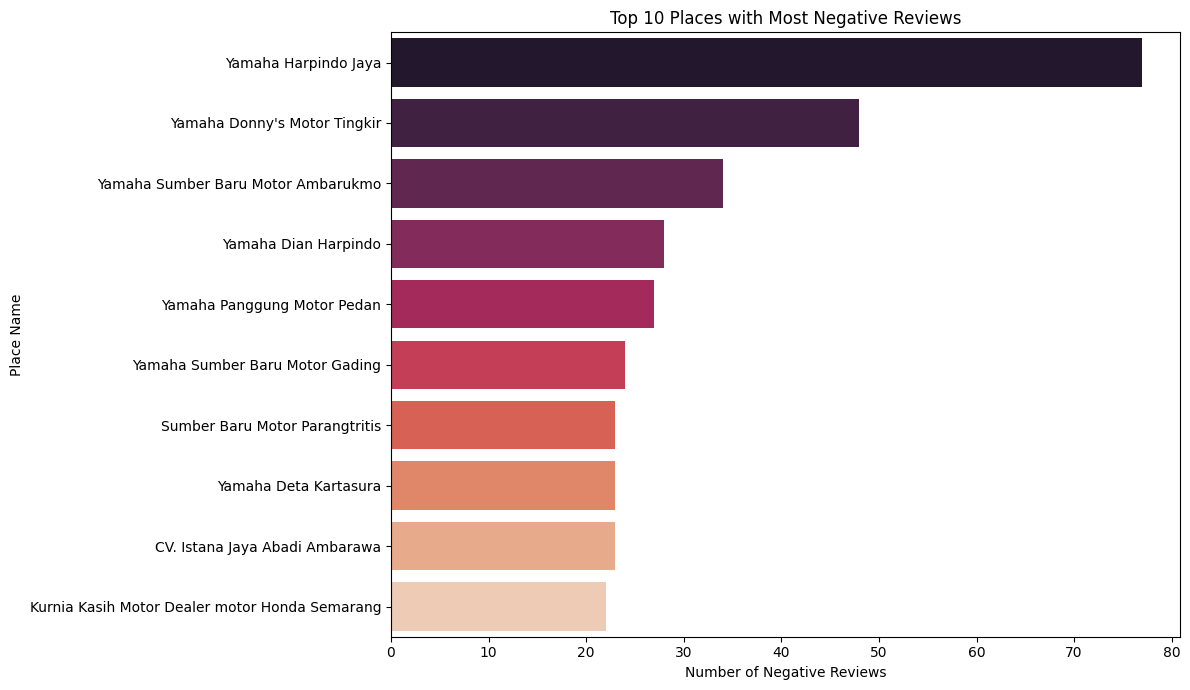

In [10]:
plt.figure(figsize=(12, 7))
sns.barplot(x=negative_reviews_per_place.head(10).values, y=negative_reviews_per_place.head(10).index, palette='rocket')
plt.title('Top 10 Places with Most Negative Reviews')
plt.xlabel('Number of Negative Reviews')
plt.ylabel('Place Name')
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` due to `palette` being passed without assigning a `hue` argument to `sns.barplot`. To address this, I will explicitly assign the `y` variable to `hue` and set `legend=False` to maintain the intended visualization without the warning.



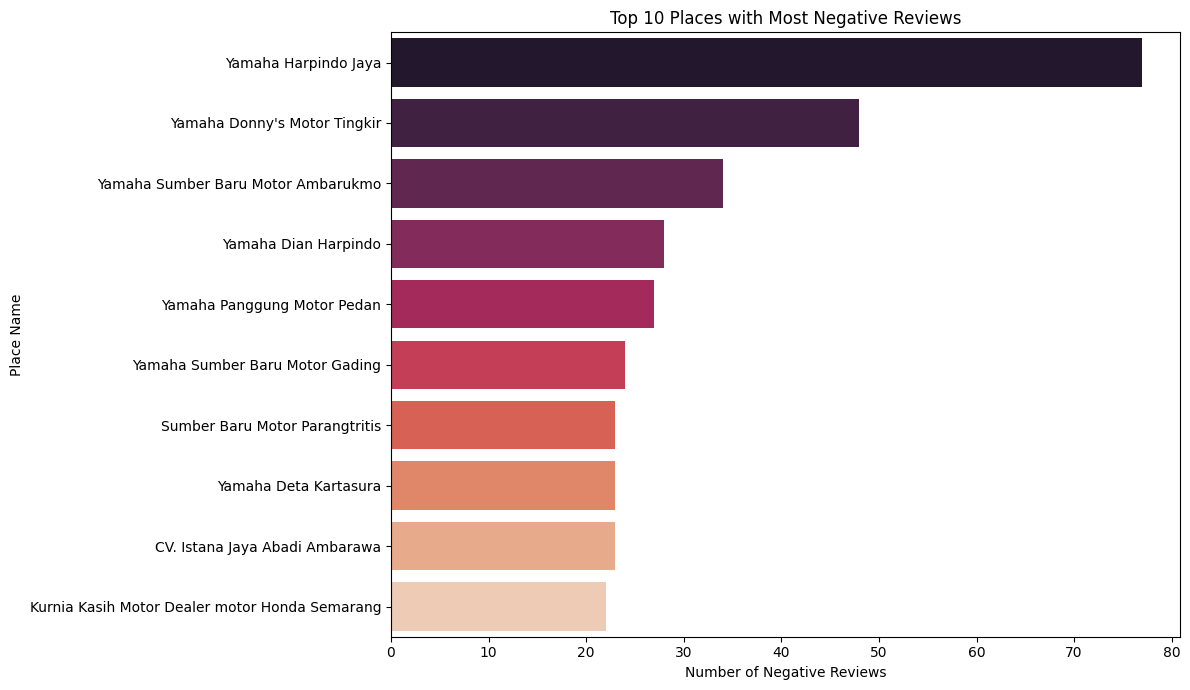

In [11]:
plt.figure(figsize=(12, 7))
sns.barplot(x=negative_reviews_per_place.head(10).values, y=negative_reviews_per_place.head(10).index, hue=negative_reviews_per_place.head(10).index, palette='rocket', legend=False)
plt.title('Top 10 Places with Most Negative Reviews')
plt.xlabel('Number of Negative Reviews')
plt.ylabel('Place Name')
plt.tight_layout()
plt.show()

## Identify Top Complaints for Each Top Place

### Subtask:
For each of the top 10 'Nama Tempat' identified in the previous step, calculate and display their top 3 bigram complaints from the 'clean_text' column.


**Reasoning**:
To identify the top 3 bigram complaints for each of the top 10 places, I will iterate through the top 10 places, filter the `negative_reviews` DataFrame for each place, and then apply the `get_top_n_gram` function to find their specific top bigram complaints.



In [12]:
print("Top 3 Bigram Complaints for Each of the Top 10 Places:")
for place_name in negative_reviews_per_place.head(10).index:
    place_reviews = negative_reviews[negative_reviews['Nama Tempat'] == place_name]
    top_3_bigrams = get_top_n_gram(place_reviews['clean_text'], n=3, n_gram=2)
    print(f"\nPlace: {place_name}")
    for complaint, count in top_3_bigrams:
        print(f"  - '{complaint}': {count}")

Top 3 Bigram Complaints for Each of the Top 10 Places:

Place: Yamaha Harpindo Jaya
  - 'teks ulasan': 11
  - 'datang jam': 5
  - 'service yamaha': 3

Place: Yamaha Donny's Motor Tingkir
  - 'beli motor': 23
  - 'stnk plat': 10
  - 'stnk bpkb': 10

Place: Yamaha Sumber Baru Motor Ambarukmo
  - 'service disini': 4
  - 'teks ulasan': 4
  - 'mesin starter': 3

Place: Yamaha Dian Harpindo
  - 'teks ulasan': 9
  - 'mekanik fokus': 2
  - 'fokus motor': 2

Place: Yamaha Panggung Motor Pedan
  - 'kurang teliti': 4
  - 'atas nama': 4
  - 'tempat beli': 3

Place: Yamaha Sumber Baru Motor Gading
  - 'ruang tunggu': 3
  - 'hari minggu': 3
  - 'pukul wib': 3

Place: Sumber Baru Motor Parangtritis
  - 'teks ulasan': 5
  - 'servis besar': 3
  - 'ganti oli': 2

Place: Yamaha Deta Kartasura
  - 'service disini': 4
  - 'motor masih': 4
  - 'service motor': 3

Place: CV. Istana Jaya Abadi Ambarawa
  - 'teks ulasan': 10
  - 'ambil unit': 2
  - 'pelayanan sales': 2

Place: Kurnia Kasih Motor Dealer motor H

## Final Task

### Subtask:
Summarize the findings, highlighting which places receive the most negative reviews and what specific issues are most common for those locations.


## Summary:

### Q&A
*   The places receiving the most negative reviews are led by 'Yamaha Harpindo Jaya' (77 reviews), followed by 'Yamaha Donny\'s Motor Tingkir' (48 reviews), and 'Yamaha Sumber Baru Motor Ambarukmo' (34 reviews).
*   Specific common issues for these top locations include:
    *   For 'Yamaha Harpindo Jaya': 'teks ulasan', 'datang jam', and 'service yamaha'.
    *   For 'Yamaha Donny\'s Motor Tingkir': 'beli motor', 'stnk plat', and 'stnk bpkb'.
    *   For 'Kurnia Kasih Motor Dealer motor Honda Semarang': 'beli motor', 'bengkel resmi', and 'service motor'.

### Data Analysis Key Findings
*   'Yamaha Harpindo Jaya' recorded the highest number of negative reviews, with 77 complaints.
*   'Yamaha Donny\'s Motor Tingkir' and 'Yamaha Sumber Baru Motor Ambarukmo' were the second and third highest, with 48 and 34 negative reviews, respectively.
*   Among the top 10 places, 'beli motor' (buy motorcycle) was a recurring bigram complaint, appearing as a top issue for 'Yamaha Donny\'s Motor Tingkir' (23 occurrences), 'Kurnia Kasih Motor Dealer motor Honda Semarang' (6 occurrences), and 'AHASS KARTIKA MOTOR' (5 occurrences).
*   Issues related to vehicle documents like 'stnk plat' and 'stnk bpkb' were prominent for 'Yamaha Donny\'s Motor Tingkir' (10 occurrences each).
*   Service-related complaints like 'service yamaha' (3 occurrences for 'Yamaha Harpindo Jaya') and 'bengkel resmi' / 'service motor' (5 occurrences each for 'Kurnia Kasih Motor Dealer motor Honda Semarang') also featured in the top complaints.

### Insights or Next Steps
*   Investigate the operational procedures at 'Yamaha Harpindo Jaya' to understand the root causes of the high volume of negative reviews and address specific issues like 'service yamaha'.
*   For dealerships like 'Yamaha Donny\'s Motor Tingkir' and 'Kurnia Kasih Motor Dealer motor Honda Semarang', review and streamline the vehicle purchasing and documentation processes to mitigate complaints related to 'beli motor', 'stnk plat', and 'stnk bpkb'.
